In [1]:
import nltk
import warnings
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from env import github_token, github_username
from acquire import search_github_repositories, get_repo
from prepare import basic_clean, tokenize, remove_stopwords, preprocess_text_in_dataframe
from explore import calculate_basic_statistics, identify_most_common_words, analyze_readme_lengths, generate_word_cloud, plot_readme_length_histogram

warnings.filterwarnings('ignore')

## Acquire

In [18]:
df = get_repo("artificial intelligence")

In [19]:
df.head()

,Name,Language,Readme
0,awesome-artificial-intelligence,NaN,# Awesome Artificial Intelligence (AI) [![Awes...
1,Artificial-Intelligence,NaN,All about AI with Cheat-Sheets(+100 Cheat-shee...
2,opencog,Scheme,NaN
3,Artificial-Intelligence-Deep-Learning-Machine-...,Python,# NEW LIST 2023 - 2024: Machine-Learning / Dee...
4,artificial-intelligence,Python,# Artificial Intelligence Nanodegree Program R...


In [20]:
df.isna().sum()

Name          0
Language    135
Readme      127
dtype: int64

## Prepare

In [4]:
df = df.dropna()

In [5]:
#convert all column names to lowercase
df.columns = [column.lower() for column in df.columns]

In [6]:
# Preprocess the text data in the 'readme' column of the DataFrame
# The preprocess_text_in_dataframe function performs text cleaning and transformation,
# which may include tasks like lowering text, removing special characters, tokenization, stemming,
# or lemmatization, and removing stopwords, depending on the implementation of the function.
# The processed text is then assigned back to the 'readme' column in the DataFrame.
stop_words = ['ai', 'artificial intelligence', 'machine learning', 'deep learning']
df = preprocess_text_in_dataframe(df, 'readme', extra_words=stop_words)

In [7]:
df.head()

,name,language,readme
2,opencog,Scheme,
3,Artificial-Intelligence-Deep-Learning-Machine-...,Python,new list 2023 2024 machinelearning deeplearnin...
4,artificial-intelligence,Python,artificial intelligence nanodegree program res...
5,artificial-intelligence,Jupyter Notebook,artificial intelligence projectbased artificia...
6,artificial-intelligence-for-trading,Jupyter Notebook,trading nanodegree aitnd repository contains c...


## Explore

In [8]:
basic_stats = calculate_basic_statistics(df, 'readme')
basic_stats

count     865
unique    749
top          
freq      115
Name: readme, dtype: object

In [9]:
readme_lengths = analyze_readme_lengths(df, 'readme')
readme_lengths.sort_values(ascending=False).head(20)

231    204966
52     165549
320    120021
140    107590
696     71552
3       52139
753     52129
811     52129
133     44869
48      34088
271     29562
506     28719
668     25225
437     21749
110     21167
767     19834
390     19355
128     19213
339     18270
272     18175
Name: readme, dtype: int64

In [10]:
#top words in the readme column
top_words = identify_most_common_words(df, 'readme', top_n=10)
top_words

learning        2236
data            1767
&#9;            1756
machine         1353
intelligence    1301
artificial      1297
using           1207
python          1194
model           1144
1               1070
Name: count, dtype: int64

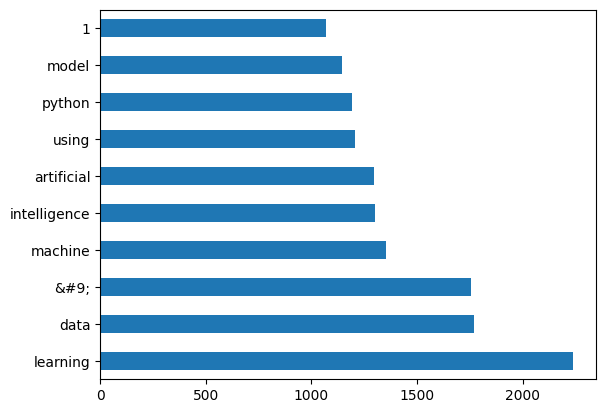

In [11]:
#visualization of the top words in readme
top_words.plot.barh()
plt.show()

In [12]:
df.head()

,name,language,readme
2,opencog,Scheme,
3,Artificial-Intelligence-Deep-Learning-Machine-...,Python,new list 2023 2024 machinelearning deeplearnin...
4,artificial-intelligence,Python,artificial intelligence nanodegree program res...
5,artificial-intelligence,Jupyter Notebook,artificial intelligence projectbased artificia...
6,artificial-intelligence-for-trading,Jupyter Notebook,trading nanodegree aitnd repository contains c...


In [13]:
# Tokenize the "readme" column
df['readme_tokens'] = df['readme'].apply(nltk.word_tokenize)

# Extract all bigrams
all_bigrams = [bigram for tokens in df['readme_tokens'] for bigram in list(nltk.bigrams(tokens))]

# Count the occurrences of each bigram
bigram_counts = Counter(all_bigrams)

# Find the top N bigrams
top_n_bigrams = bigram_counts.most_common(10)  # Change 10 to the desired number of top bigrams

# Print the top bigrams and their frequencies
for bigram, frequency in top_n_bigrams:
    print(bigram, frequency)

('&', '#') 1756
('#', '9') 1756
('9', ';') 1756
('artificial', 'intelligence') 1172
('machine', 'learning') 1062
(';', '&') 600
('deep', 'learning') 424
('neural', 'networks') 355
('neural', 'network') 243
('reinforcement', 'learning') 197


In [14]:
top_n_bigrams = bigram_counts.most_common(10)

In [15]:
top_n_bigrams = pd.DataFrame(top_n_bigrams)

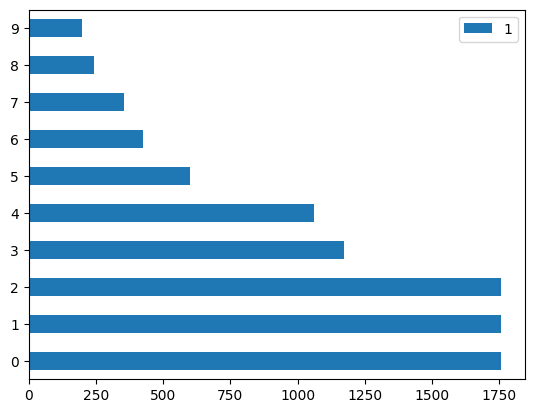

In [16]:
top_n_bigrams.plot.barh()
plt.show()

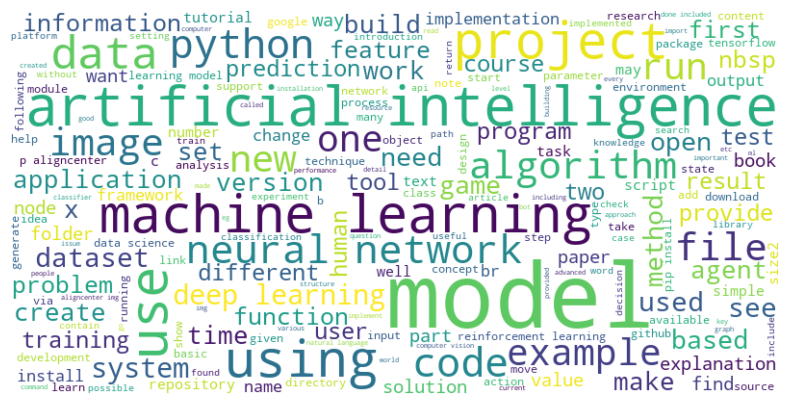

In [17]:
#wordcloud of the words in the readme column
generate_word_cloud(df, 'readme')

In [ ]:
df.